In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import read_log

In [2]:
def clean_list(lis):
    return [el for el in lis if el != '']

In [3]:
def update_volatility(prices):
    lambda_=0.94
    vol_floor=0.5
    if len(prices) < 2:
        return vol_floor
    log_returns = np.diff(np.log(prices))
    squared_returns = log_returns**2
    weights = (1 - lambda_) * lambda_**np.arange(len(squared_returns))[::-1]
    ewma_vol = np.sqrt(np.sum(weights * squared_returns))
    return max(ewma_vol, vol_floor)

In [4]:
def avellaneda_stoikov_reservation_price(price, position, volatility):
    gamma = 0.2  # risk aversion
    spread = 1

    reservation_price = price - position * gamma * volatility**2
    return reservation_price

# Backtest

In [96]:
sandbox, activities, trades = read_log('../backtests/2025-04-12_21-22-01.log')

Error parsing JSON: Expecting property name enclosed in double quotes: line 9 column 3 (char 150)


In [97]:
spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

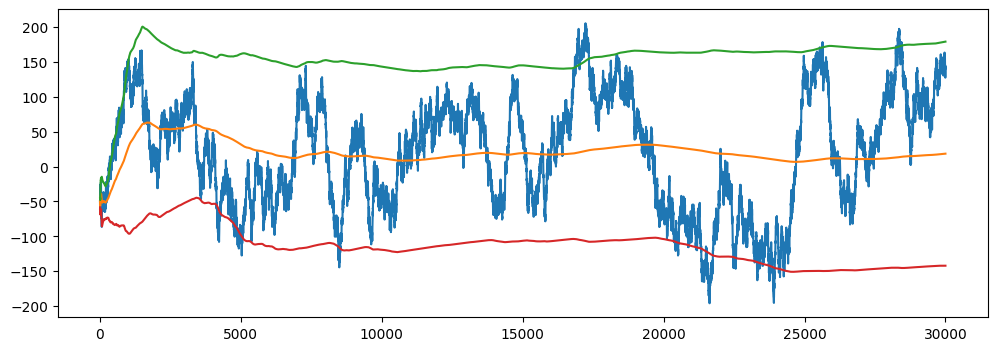

In [88]:
plt.figure(figsize=(12, 4))
plt.plot(spr)
plt.plot(spr.expanding().mean())
plt.plot(spr.expanding().mean() + 2 * spr.expanding().std())
plt.plot(spr.expanding().mean() - 2 * spr.expanding().std())
plt.show()

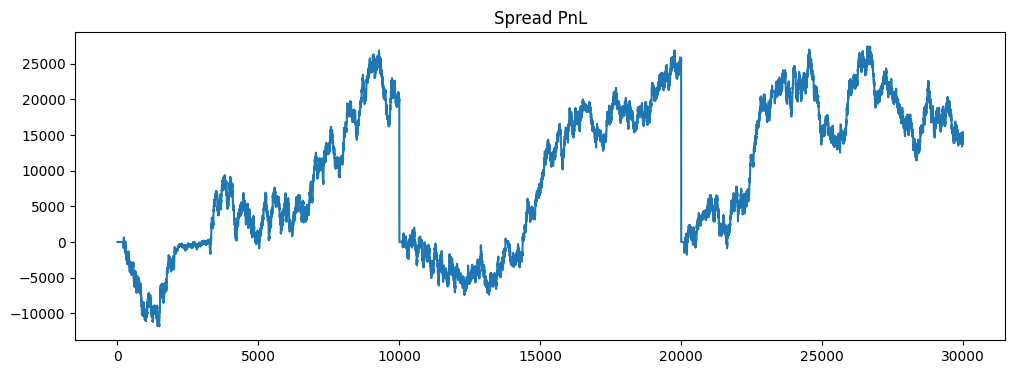

In [98]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'CROISSANTS']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'JAMS']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'DJEMBES']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'PICNIC_BASKET1']['profit_and_loss'].to_numpy() +
         activities[activities['product'] == 'PICNIC_BASKET2']['profit_and_loss'].to_numpy())
plt.title('Spread PnL')
plt.show()

# Website

In [99]:
sandbox, activities, trades = read_log('../data/logs/round_2/58959272-c3a8-40ff-be09-678c3d640985.log')

In [100]:
buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()

C:\Users\aeali\AppData\Local\Temp\ipykernel_15216\1531186028.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  buys = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['buyer'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()
C:\Users\aeali\AppData\Local\Temp\ipykernel_15216\1531186028.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sells = (trades[trades['symbol'] == 'PICNIC_BASKET1'][trades['seller'] == 'SUBMISSION']['timestamp'] // 100).to_numpy()


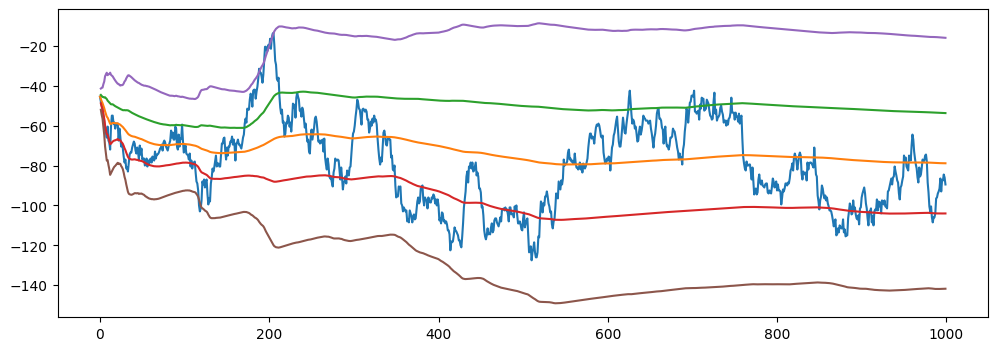

In [101]:
spr = pd.Series(activities[activities['product'] == 'PICNIC_BASKET1']['mid_price'].to_numpy() -
        activities[activities['product'] == 'PICNIC_BASKET2']['mid_price'].to_numpy() -
        2 * activities[activities['product'] == 'CROISSANTS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'JAMS']['mid_price'].to_numpy() -
        activities[activities['product'] == 'DJEMBES']['mid_price'].to_numpy())

plt.figure(figsize=(12, 4))
plt.plot(spr)
plt.plot(spr.expanding().mean())
plt.plot(spr.expanding().mean() + 1.2 * spr.expanding().std())
plt.plot(spr.expanding().mean() - 1.2 * spr.expanding().std())
plt.plot(spr.expanding().mean() + 3 * spr.expanding().std())
plt.plot(spr.expanding().mean() - 3 * spr.expanding().std())
for b in buys:
    plt.axvline(b, c='tab:green', alpha=0.1)
for s in sells:
    plt.axvline(s, c='tab:red', alpha=0.1)
plt.show()

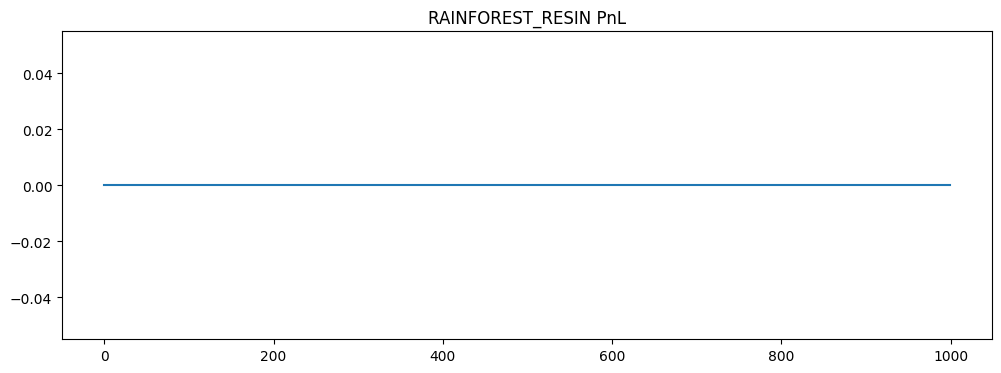

In [108]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'].to_numpy())
plt.title('RAINFOREST_RESIN PnL')
plt.show()

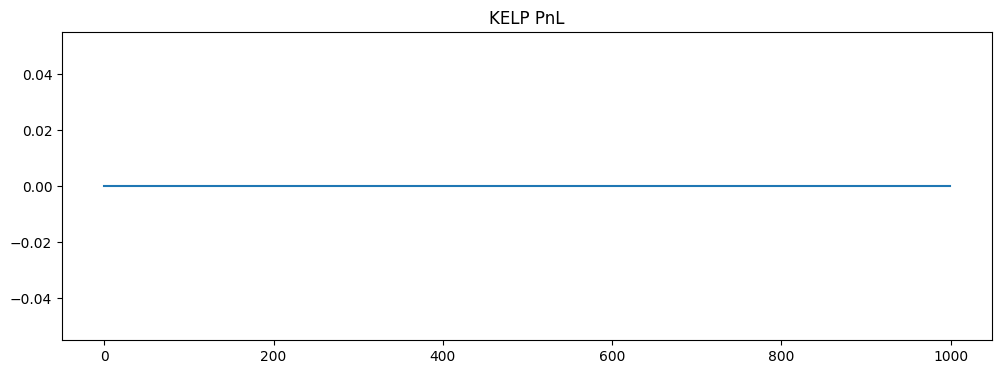

In [109]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'].to_numpy())
plt.title('KELP PnL')
plt.show()

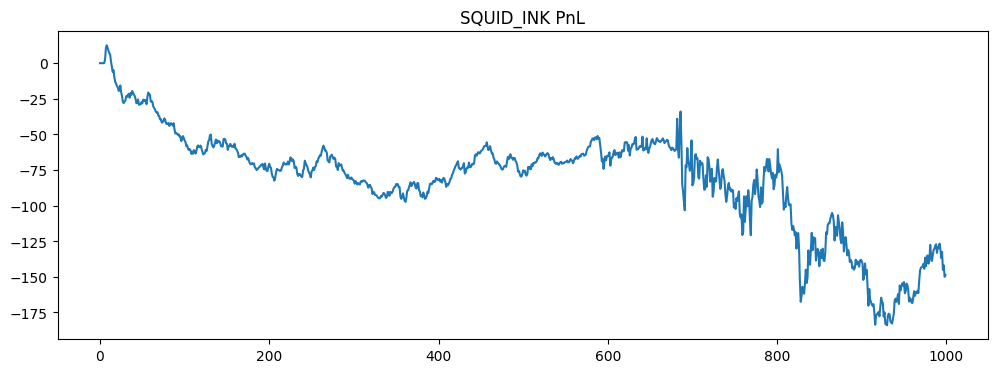

In [110]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'].to_numpy())
plt.title('SQUID_INK PnL')
plt.show()

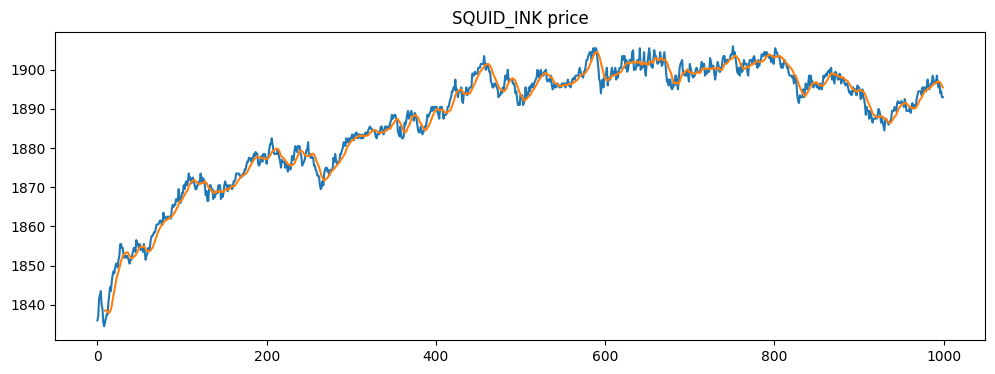

In [115]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].to_numpy())
plt.plot(activities[activities['product'] == 'SQUID_INK']['mid_price'].rolling(10).mean().to_numpy())
plt.title('SQUID_INK price')
plt.show()

# Final

In [18]:
sandbox, activities, trades = read_log('../data/logs/round_1/35067d81-e239-45a0-970c-b1f98fbdc706_final.log')

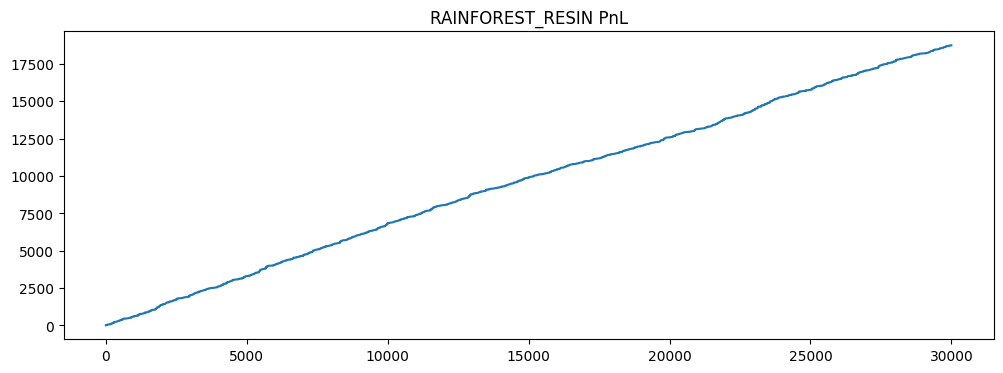

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'RAINFOREST_RESIN']['profit_and_loss'])
plt.title('RAINFOREST_RESIN PnL')
plt.show()

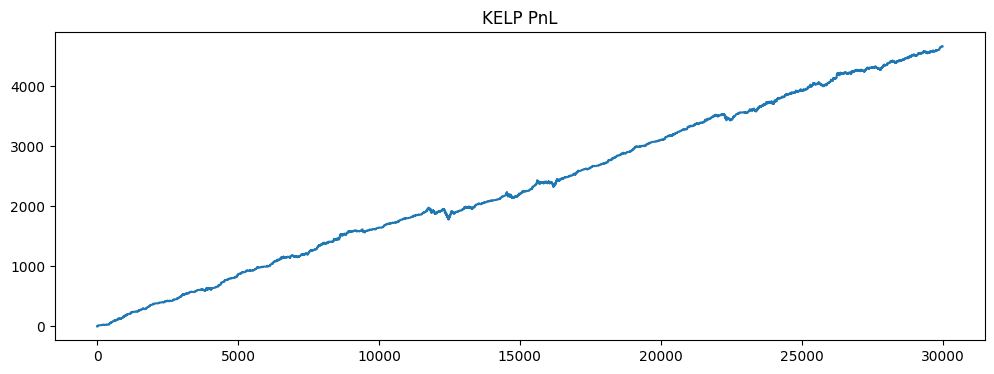

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'KELP']['profit_and_loss'])
plt.title('KELP PnL')
plt.show()

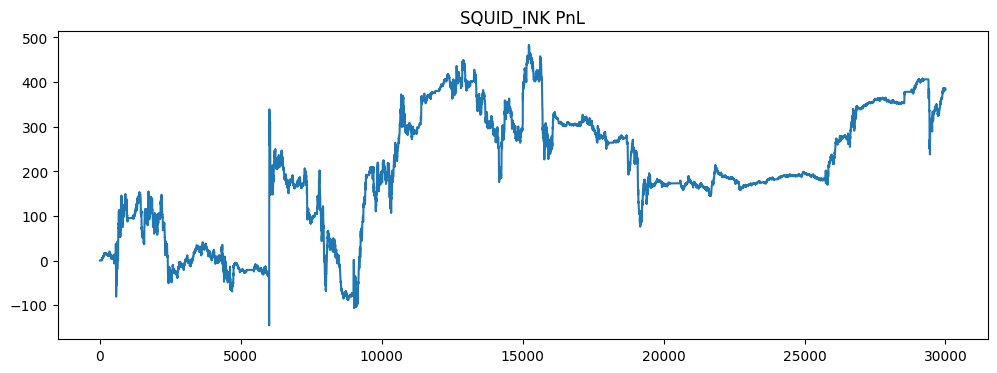

In [21]:
plt.figure(figsize=(12, 4))
plt.plot(activities[activities['product'] == 'SQUID_INK']['profit_and_loss'])
plt.title('SQUID_INK PnL')
plt.show()

# Analysis

In [26]:
prices = activities[activities['product'] == 'SQUID_INK']['mid_price']
vol = prices.rolling(100).apply(update_volatility)

In [27]:
prices.shape, vol.shape

((1000,), (1000,))

<Axes: >

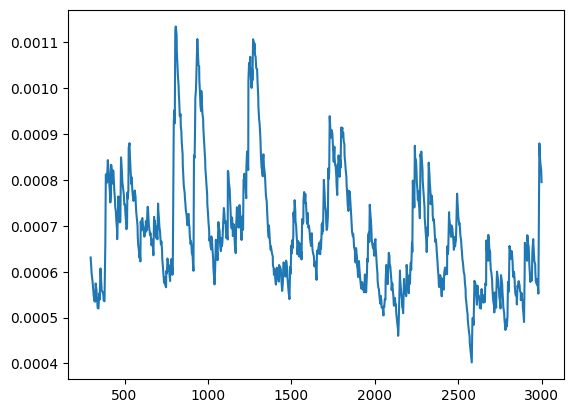

In [28]:
vol.plot()

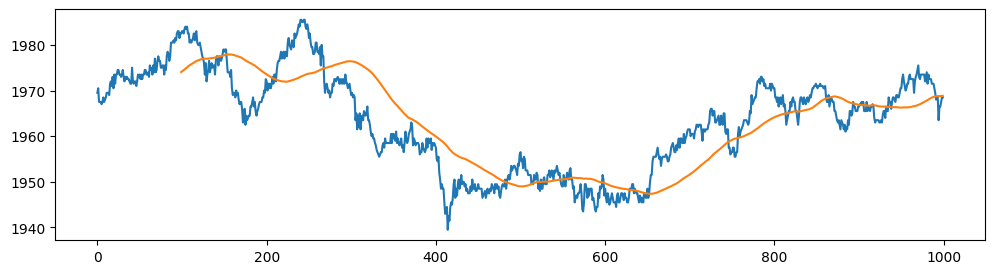

In [7]:
plt.figure(figsize=(12, 3))
plt.plot(prices)
plt.plot(pd.Series(prices).rolling(100).mean())
plt.show()

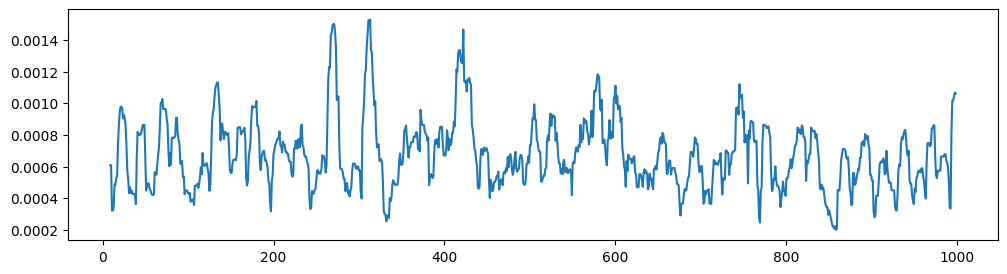

In [40]:
plt.figure(figsize=(12, 3))
plt.plot(pd.Series(logr).rolling(10).std())
plt.show()

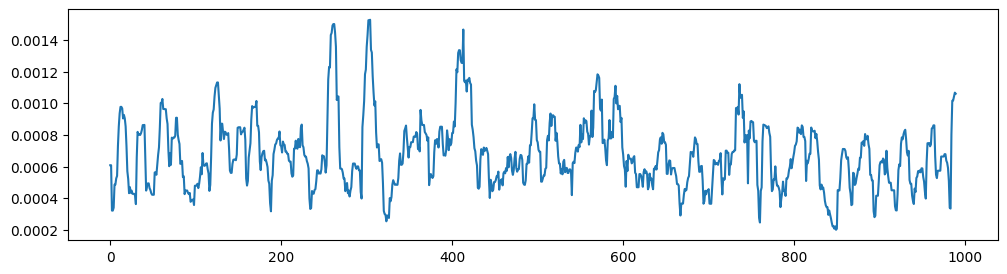

In [34]:
plt.figure(figsize=(12, 3))
plt.plot(vol)
plt.show()

In [31]:
# for i in range(100):
    # print(clean_list(sandbox['lambdaLog'].iloc[i].split('---')[0].split('\n')))
    # print(clean_list(sandbox['lambdaLog'].iloc[i].split('---')[1].split('\n')))

In [32]:
activities

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,RAINFOREST_RESIN,9998,9,9995.0,23.0,NaN,NaN,10005,23,NaN,NaN,NaN,NaN,10001.5,0.0
1,0,0,KELP,2028,23,NaN,NaN,NaN,NaN,2032,23,NaN,NaN,NaN,NaN,2030.0,0.0
2,0,0,SQUID_INK,1968,23,NaN,NaN,NaN,NaN,1971,23,NaN,NaN,NaN,NaN,1969.5,0.0
3,0,100,SQUID_INK,1970,1,1969.0,2.0,1967.0,22.0,1971,22,NaN,NaN,NaN,NaN,1970.5,0.0
4,0,100,KELP,2031,1,2030.0,2.0,2028.0,22.0,2032,22,NaN,NaN,NaN,NaN,2031.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,99800,KELP,2028,26,NaN,NaN,NaN,NaN,2031,26,NaN,NaN,NaN,NaN,2029.5,572.0
2996,0,99800,SQUID_INK,1967,26,NaN,NaN,NaN,NaN,1970,26,NaN,NaN,NaN,NaN,1968.5,0.0
2997,0,99900,KELP,2028,27,NaN,NaN,NaN,NaN,2031,28,NaN,NaN,NaN,NaN,2029.5,572.0
2998,0,99900,SQUID_INK,1967,27,NaN,NaN,NaN,NaN,1970,28,NaN,NaN,NaN,NaN,1968.5,0.0


In [27]:
activities[activities['product'] == 'KELP'].head(10)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,NaN,NaN,NaN,NaN,2028.5,0.000000
2,-1,100,KELP,2025,24,NaN,NaN,NaN,NaN,2028,2,2029.0,22.0,NaN,NaN,2026.5,17.361328
5,-1,200,KELP,2025,22,NaN,NaN,NaN,NaN,2028,20,NaN,NaN,NaN,NaN,2026.5,18.537109
6,-1,300,KELP,2025,31,NaN,NaN,NaN,NaN,2028,2,2029.0,29.0,NaN,NaN,2026.5,17.210938
9,-1,400,KELP,2025,27,NaN,NaN,NaN,NaN,2028,27,NaN,NaN,NaN,NaN,2026.5,19.609375
10,-1,500,KELP,2025,30,NaN,NaN,NaN,NaN,2028,30,NaN,NaN,NaN,NaN,2026.5,23.187500
13,-1,600,KELP,2026,5,2025.0,31.0,NaN,NaN,2028,25,NaN,NaN,NaN,NaN,2027.0,26.734375
14,-1,700,KELP,2025,2,2024.0,23.0,NaN,NaN,2028,23,NaN,NaN,NaN,NaN,2026.5,32.113281
17,-1,800,KELP,2024,1,2023.0,29.0,NaN,NaN,2027,30,NaN,NaN,NaN,NaN,2025.5,41.849609
18,-1,900,KELP,2024,23,NaN,NaN,NaN,NaN,2027,23,NaN,NaN,NaN,NaN,2025.5,34.443359
